### Timeline Analysis -- Covid-19

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import folium
import pylab as pl

In [2]:
# Reading the dataset

data = pd.read_csv('owid-covid-data.csv');
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
# getting a statistical summary

data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.432550e+05,2.429780e+05,2.417740e+05,2.235980e+05,223498.000000,222312.000000,242150.000000,241873.000000,240674.000000,222506.000000,...,154930.000000,102165.000000,184664.000000,236559.000000,202446.000000,2.566480e+05,8.531000e+03,8531.000000,8531.000000,8531.000000
mean,5.270465e+06,1.181568e+04,1.186330e+04,7.972768e+04,127.486134,128.066771,73270.553190,178.320569,178.820556,751.458559,...,32.820586,50.898942,3.089252,73.598561,0.724543,1.405343e+08,5.167216e+04,10.313593,14.114181,1490.624400
std,3.242531e+07,8.218272e+04,7.989567e+04,4.062786e+05,738.436908,684.529716,123801.009995,1128.970607,668.060312,1027.829552,...,13.539108,31.884357,2.551542,7.446250,0.149554,6.916757e+08,1.407291e+05,13.242279,25.822521,1831.869984
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281600
25%,5.708500e+03,0.000000e+00,4.571000e+00,1.240000e+02,0.000000,0.000000,1377.406750,0.000000,0.939000,34.240250,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.367830e+05,8.600001e+01,1.045000,0.250000,51.556450
50%,6.189000e+04,3.800000e+01,7.785700e+01,1.358000e+03,0.000000,1.143000,13927.810000,4.859000,16.173500,248.868500,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.983201e+03,7.970000,7.580000,927.002100
75%,6.402300e+05,8.260000e+02,1.006821e+03,1.097200e+04,11.000000,13.571000,87213.398750,84.261000,123.671250,1129.299000,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.765704e+04,16.310000,19.180000,2399.098100
max,6.733469e+08,4.082888e+06,3.436560e+06,6.857286e+06,60788.000000,14860.286000,720435.220000,228872.025000,36421.827000,6440.753000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.253111e+06,76.550000,376.770000,10112.677000


In [4]:
# Checking for count of all the unique values present for each attribute

data.nunique()

iso_code                                      248
continent                                       6
location                                      248
date                                         1142
total_cases                                125055
                                            ...  
population                                    247
excess_mortality_cumulative_absolute         8454
excess_mortality_cumulative                  3729
excess_mortality                             4512
excess_mortality_cumulative_per_million      8513
Length: 67, dtype: int64

In [5]:
# Checking for count of NULL values for each column

data.isnull().sum()

iso_code                                        0
continent                                   14467
location                                        0
date                                            0
total_cases                                 14498
                                            ...  
population                                   1105
excess_mortality_cumulative_absolute       249222
excess_mortality_cumulative                249222
excess_mortality                           249222
excess_mortality_cumulative_per_million    249222
Length: 67, dtype: int64

In [6]:
# Continents in terms of occurence of covid cases on basis of iso_codes

data.continent.value_counts()[0:10]

Europe           58965
Africa           58503
Asia             54694
North America    38737
Oceania          18359
South America    14028
Name: continent, dtype: int64

In [7]:
# Collecting Asia Data from the given dataset

asia_data = data[data['continent'] =='Asia']
asia_data = asia_data[asia_data['date'] =='13-04-2022']
asia_data = asia_data[~asia_data['location'].isin(['World','International'])]
asia_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
779,AFG,Asia,Afghanistan,13-04-2022,178295.0,38.0,45.857,7676.0,0.0,0.714,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
10572,ARM,Asia,Armenia,13-04-2022,422711.0,20.0,14.429,8621.0,0.0,0.286,...,52.1,94.043,4.2,75.09,0.776,2780472.0,NaN,NaN,NaN,NaN
16049,AZE,Asia,Azerbaijan,13-04-2022,792305.0,16.0,23.429,9704.0,1.0,0.429,...,42.5,83.241,4.7,73.00,0.756,10358078.0,NaN,NaN,NaN,NaN
18204,BHR,Asia,Bahrain,13-04-2022,561525.0,460.0,502.571,1473.0,0.0,0.143,...,37.6,NaN,2.0,77.29,0.852,1472237.0,NaN,NaN,NaN,NaN
19279,BGD,Asia,Bangladesh,13-04-2022,1952162.0,31.0,37.000,29124.0,0.0,0.143,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN


In [8]:
top_10_asia_deaths  = asia_data.sort_values("total_deaths", ascending = False)
top_10_asia_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
105624,IND,Asia,India,13-04-2022,43039023.0,1007.0,1009.286,521737.0,1.0,29.571,...,20.6,59.550,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
106705,IDN,Asia,Indonesia,13-04-2022,6036909.0,1551.0,1512.143,155746.0,29.0,40.286,...,76.1,64.204,1.04,71.72,0.718,2.755013e+08,NaN,NaN,NaN,NaN
108903,IRN,Asia,Iran,13-04-2022,7199861.0,2356.0,2836.143,140711.0,33.0,37.143,...,21.1,NaN,1.50,76.68,0.783,8.855057e+07,NaN,NaN,NaN,NaN
235229,TUR,Asia,Turkey,13-04-2022,14978031.0,5529.0,6875.143,98493.0,31.0,31.143,...,41.1,NaN,2.81,77.69,0.820,8.534125e+07,NaN,NaN,NaN,NaN
184130,PHL,Asia,Philippines,13-04-2022,3682083.0,232.0,262.714,59891.0,113.0,67.000,...,40.8,78.463,1.00,71.23,0.718,1.155590e+08,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Total deaths across asian countries')

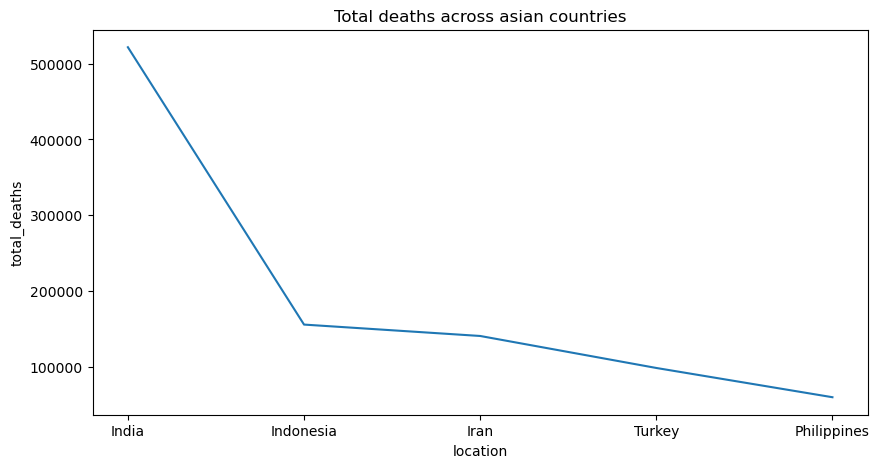

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'location', y = 'total_deaths', data = top_10_asia_deaths[0 : 5])
plt.title("Total deaths across asian countries")

In [10]:
# Asian countries with least number of total_cases being reported

least_asia_cases = asia_data.sort_values("total_cases_per_million", ascending =True)
least_asia_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
137262,MAC,Asia,Macao,13-04-2022,82.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,84.24,NaN,6.951800e+05,NaN,NaN,NaN,NaN
47261,CHN,Asia,China,13-04-2022,488360.0,29387.0,25574.143,4926.0,0.0,0.143,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
255316,YEM,Asia,Yemen,13-04-2022,11815.0,1.0,0.429,2147.0,0.0,0.429,...,29.2,49.542,0.70,66.12,0.470,3.369661e+07,NaN,NaN,NaN,NaN
225442,TWN,Asia,Taiwan,13-04-2022,29593.0,927.0,624.000,854.0,0.0,0.143,...,NaN,NaN,NaN,80.46,NaN,2.389340e+07,NaN,NaN,NaN,NaN
226463,TJK,Asia,Tajikistan,13-04-2022,17786.0,0.0,0.000,125.0,0.0,0.000,...,NaN,72.704,4.80,71.10,0.668,9.952789e+06,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='location', ylabel='total_cases_per_million'>

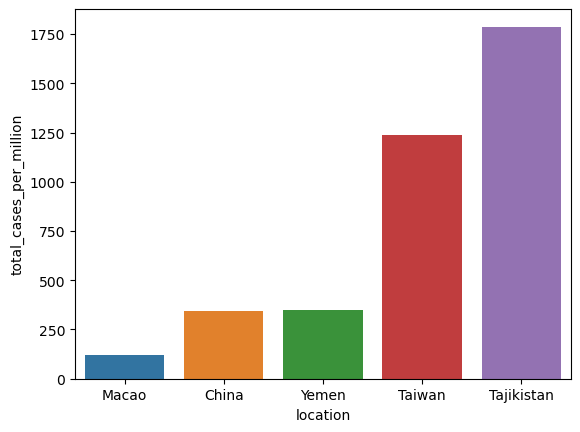

In [11]:
sns.barplot(x = "location", y = "total_cases_per_million", data = least_asia_cases.head())

Text(0.5, 1.0, 'Total Cases vs Total Death Scenarios')

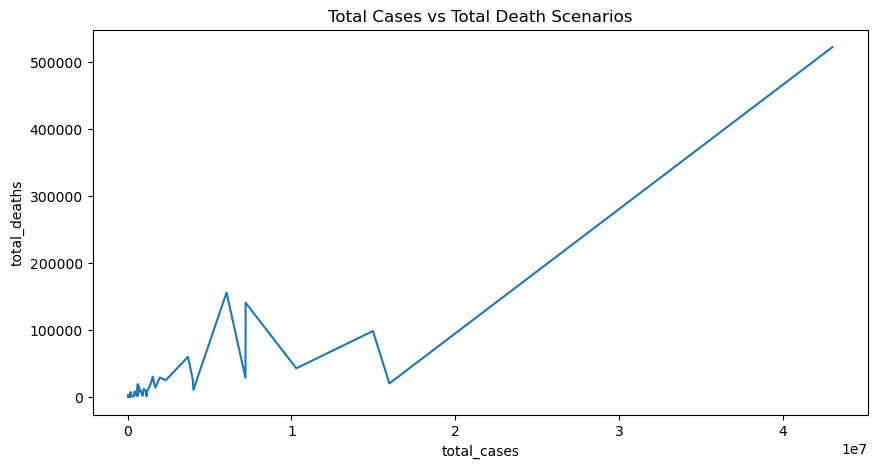

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'total_cases', y = 'total_deaths', data = asia_data)
plt.title("Total Cases vs Total Death Scenarios")

### Conclusions : 

1. India is the one of the most affected Asian country as it has the highest number of deaths.
2. Laos has reported the least number of cases in Asia.